In [1]:
import numpy
from matplotlib import pyplot
import ipywidgets
import sympy
from IPython.display import display

In [2]:
def tangent(I_x, I_y, S):
    """Get x,y to plot a line with slope S around the coordinate <I_x,I_y>."""
    x = numpy.linspace(I_x-1,I_x+1,2)
    y = -S*I_x + I_y + S*x
    return x, y

### Parametrization

Various parameterizations of the 5-parameter logistic function, also known as the generalized logistic function can be found in the literature:

[Gottschalk & Dunn, 2005](https://www.sciencedirect.com/science/article/pii/S0003269705003313), with $c>0$ and $g>0$:

In [3]:
x, y, a, b, d = sympy.symbols('x y a b d')
c, g = sympy.symbols('c g', real=True, positive=True)
sympy.Eq(lhs=y, rhs=d+(a-d)/(1+(x/c)**b)**g)

Eq(y, d + (a - d)*((x/c)**b + 1)**(-g))

[Richards, 1959](https://academic.oup.com/jxb/article/10/2/290/528209) / [Fekedulegn, 1999](https://doi.org/10.14214/sf.653) / [Wikipedia](https://en.wikipedia.org/wiki/Generalised_logistic_function), with $v>0$:

In [4]:
x, y, a, b, k, m = sympy.symbols('x y a b k m')
v = sympy.symbols('v', real=True, positive=True)
sympy.Eq(lhs=y, rhs=a+(k-a)/(1 + sympy.exp(-b*(x-m)))**(1/v))

Eq(y, a + (1 + exp(-b*(-m + x)))**(-1/v)*(-a + k))

Starting with the second form, we derive a parameterization were $b$, $m$ and $v$ are replaced by parameters that can be graphically interpreted, e.g. the inflection point.
We first take away $a$ and $k$, because re-scaling into those asymptotes is trivial:

In [5]:
x, y, b, m = sympy.symbols('x y b m')
v = sympy.symbols('v', real=True, positive=True)
sympy.Eq(lhs=y, rhs=1/(1 + sympy.exp(-b*(x-m)))**(1/v))

Eq(y, (1 + exp(-b*(-m + x)))**(-1/v))

Then we replace $1/v,\ v \in \mathcal{R}_{>0}$ with $e^{-c},\ c\in\mathcal{R}$:

In [6]:
x, y, b, m, c = sympy.symbols('x y b m c')
sympy.Eq(lhs=y, rhs=1/(1 + sympy.exp(-b*(x-m)))**sympy.exp(-c))

Eq(y, (1 + exp(-b*(-m + x)))**(-exp(-c)))

Finally, we rename $m$ to $a$ and flip the sign on $b$:

In [7]:
x, y, a, b, c = sympy.symbols('x y a b c', real=True)
f_abc = (sympy.exp(b*(a-x)) + 1)**-sympy.exp(-c)
f_inverse_abc = sympy.simplify(sympy.solve(f_abc-y, x)[0])
display(sympy.Eq(lhs=y, rhs=f_abc))
display(sympy.Eq(lhs=x, rhs=f_inverse_abc))

Eq(y, (exp(b*(a - x)) + 1)**(-exp(-c)))

Eq(x, a + log(1/((1/y)**exp(c) - 1))/b)

### Analytically finding the inflection point & tangent

In [8]:
slope = sympy.simplify(sympy.diff(f_abc, x))
print("f'(x) = ")
display(slope)

f'(x) = 


b*(exp(b*(a - x)) + 1)**(-1 - exp(-c))*exp(b*(a - x) - c)

In [9]:
I_x = sympy.symbols('I_x', real=True)
analytic_I_x = sympy.simplify(sympy.solve(sympy.diff(slope, x), x)[0])
eq_I_x = sympy.Eq(lhs=I_x, rhs=analytic_I_x)
display(eq_I_x)

Eq(I_x, a - c/b)

In [10]:
I_y = sympy.symbols('I_y', real=True)
analytic_I_y = sympy.simplify(f_abc.replace(x, analytic_I_x))
eq_I_y = sympy.Eq(lhs=I_y, rhs=analytic_I_y)
eq_I_y

Eq(I_y, (exp(c) + 1)**(-exp(-c)))

$S=f'(I_x)$ is obtained by substituting $x$ in the first derivative with the analytical solution for $I_x$:

In [11]:
S = sympy.symbols('S', real=True)
analytic_S = sympy.simplify(slope.replace(x, analytic_I_x))
eq_S = sympy.Eq(lhs=S, rhs=analytic_S)
eq_S

Eq(S, b*(exp(c) + 1)**(-1 - exp(-c)))

### Original Parameterization

In [12]:
def asymmetric_logistic_a_b_c(x, theta):
    L_L, L_U, a, b, c = theta[:5]
    x = numpy.array(x)
    return L_L + (L_U - L_L) * (numpy.exp(b*(a-x)) + 1)**-numpy.exp(-c)

def plot_logistic(L_L=0.0, L_U=1.0, a=0.0, b=3.0, c=1.0):
    theta = (L_L, L_U, a, b, c)
    
    # get key properties to visualize
    I_x = (a*b-c)/b
    I_y = L_L + (L_U - L_L) * (numpy.exp(c)+1)**-numpy.exp(-c)
    S = (L_U - L_L) * b*(numpy.exp(c)+1)**(-(numpy.exp(c)+1)*numpy.exp(-c))
    
    X_MIN, X_MAX = -5, 5
    X = numpy.linspace(-5, 5, 100)
    
    fig, ax = pyplot.subplots(figsize=(16,6))
    ax.plot(X, asymmetric_logistic_a_b_c(X, theta))
    ax.plot(*tangent(I_x, I_y, S), label='$tangent$')
    
    ax.axvline(I_x, linestyle=':', color='red', label='$I_x$')
    ax.axhline(I_y, linestyle=':', color='red', label='$I_y$')
    ax.axhline(L_U, linestyle=':', label='$L_U$')
    ax.axhline(L_L, linestyle='--', label='$L_L$')
    
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(L_L-0.5, L_U+0.5)
    ax.legend(loc='center left')
    pyplot.show()
    
ipywidgets.interact(
    plot_logistic,
    L_L=(-5.0, 0),
    L_U=(0, 5.0),
    a=(-5.0, 5),
    b=(-1.0, 3),
    c=(-2.0, 2)
);

interactive(children=(FloatSlider(value=0.0, description='L_L', max=0.0, min=-5.0), FloatSlider(value=1.0, des…

### Reparameterization for $a \to I_x$

In [13]:
display(eq_I_x)
new_a = sympy.simplify(sympy.solve(eq_I_x, a)[0])
display(sympy.Eq(lhs=a, rhs=new_a))

Eq(I_x, a - c/b)

Eq(a, I_x + c/b)

In [14]:
f_I_x = f_abc.replace(a, new_a)
f_inverse_I_x = sympy.simplify(sympy.solve(f_I_x-y, x)[0])
display(sympy.Eq(lhs=y, rhs=f_I_x))
display(sympy.Eq(lhs=x, rhs=f_inverse_I_x))

Eq(y, (exp(b*(I_x - x + c/b)) + 1)**(-exp(-c)))

Eq(x, (I_x*b + c + log(1/((1/y)**exp(c) - 1)))/b)

In [15]:
def asymmetric_logistic_I_x_b_c(x, theta):
    L_L, L_U, I_x, b, c = theta[:5]
    x = numpy.array(x)
    return L_L + (L_U-L_L) * (numpy.exp(b*(I_x-x+c/b)) + 1) ** -numpy.exp(-c)

def plot_logistic(L_L=0, L_U=1, I_x=0.0, b=2.0, c=0.0):
    theta = (L_L, L_U, I_x, b, c)
    X_MIN, X_MAX = -5, 5
    X = numpy.linspace(-5, 5, 100)
    
    # get key properties to visualize
    I_y = asymmetric_logistic_I_x_b_c(I_x, theta)
    S = (L_U - L_L) * b*(numpy.exp(c)+1)**(-(numpy.exp(c)+1)*numpy.exp(-c))
    
    fig, ax = pyplot.subplots(figsize=(16,6))
    ax.plot(X, asymmetric_logistic_I_x_b_c(X, theta))    
    ax.plot(*tangent(I_x, I_y, S), label='$tangent$')
    
    ax.axvline(I_x, linestyle=':', color='red', label='$I_x$')
    ax.axhline(I_y, linestyle=':', color='red', label='$I_y$')
    ax.axhline(L_U, linestyle=':', label='$L_U$')
    ax.axhline(L_L, linestyle='--', label='$L_L$')
    
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(L_L-0.5, L_U+0.5)
    ax.legend(loc='center left')
    pyplot.show()
    
ipywidgets.interact(
    plot_logistic,
    L_L=(-5.0,0),
    L_U=(0,5.0),
    I_x=(-5.0, 5),
    b=(-1.0, 3),
    c=(-2.0, 2)
);

interactive(children=(FloatSlider(value=0.0, description='L_L', max=0.0, min=-5.0), FloatSlider(value=1.0, des…

### Further reparameterization for $b \to S$

In [16]:
new2_a, new2_b = sympy.solve([eq_I_x, eq_S], [a, b])[0]
display(sympy.Eq(a, new2_a))
display(sympy.Eq(b, new2_b))

Eq(a, I_x*exp(c)/(exp(c) + 1) + I_x/(exp(c) + 1) + c*(exp(c) + 1)**(-1 - exp(-c))/S)

Eq(b, S*(exp(c) + 1)**((exp(c) + 1)*exp(-c)))

In [17]:
f_I_x_S = sympy.simplify(f_abc.replace(a, new2_a).replace(b, new2_b))
f_inverse_I_x_S = sympy.simplify(sympy.solve(sympy.Eq(lhs=y, rhs=f_I_x_S), x)[0])
display(sympy.Eq(lhs=y, rhs=f_I_x_S))
display(sympy.Eq(lhs=x, rhs=f_inverse_I_x_S))

Eq(y, (exp((exp(c) + 1)**((exp(c) + 1)*exp(-c))*(I_x*S - S*x + c*(exp(c) + 1)**(-(exp(c) + 1)*exp(-c)))) + 1)**(-exp(-c)))

Eq(x, (exp(c) + 1)**(-1 - exp(-c))*(I_x*S*(exp(c) + 1)**exp(-c)*exp(c) + I_x*S*(exp(c) + 1)**exp(-c) + c - log((1/y)**exp(c) - 1))/S)

In [18]:
def asymmetric_logistic_I_x_S_c(x, theta):
    L_L, L_U, I_x, S, c = theta[:5]
    # re-scale the inflection point slope with the interval
    s = S / (L_U - L_L)
    
    # common subexpressions
    x0 = numpy.exp(c) + 1
    x1 = numpy.exp(-c)
    x2 = x0 ** (x0 * x1)
    
    x = numpy.array(x)
    return L_L + (L_U-L_L) * (numpy.exp(x2 * (s*(I_x-x)+c/x2)) + 1) ** -x1

def plot_logistic(L_L=0, L_U=1, I_x=0.0, S=2.0, c=1.0):
    theta = (L_L, L_U, I_x, S, c)
    X_MIN, X_MAX = -5, 5
    X = numpy.linspace(-5, 5, 100)
    
    # get key properties to visualize
    I_y = asymmetric_logistic_I_x_S_c(I_x, theta)
    
    fig, ax = pyplot.subplots(figsize=(16,6))
    ax.plot(X, asymmetric_logistic_I_x_S_c(X, theta))
    ax.plot(*tangent(I_x, I_y, S), label='$tangent$')
    
    ax.axvline(I_x, linestyle=':', color='red', label='$I_x$')
    ax.axhline(I_y, linestyle=':', color='red', label='$I_y$')
    ax.axhline(L_U, linestyle=':', label='$L_U$')
    ax.axhline(L_L, linestyle='--', label='$L_L$')
    
    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(L_L-0.5, L_U+0.5)
    ax.legend(loc='center left')
    pyplot.show()
    
ipywidgets.interact(
    plot_logistic,
    L_L=(-5.0,0),
    L_U=(0.0,5),
    I_x=(-5.0, 5),
    S=(-2.0, 3),
    c=(-2.0, 2)
);

interactive(children=(FloatSlider(value=0.0, description='L_L', max=0.0, min=-5.0), FloatSlider(value=1.0, des…

### Further reparametrization $c \to \gamma$
We can't use $I_y$ to parameterize, because it's only valid if $L_L < I_y < L_U$. This is not practical for initial guesses in modeling.

Therefore, we must replace $I_y$ with something that depends on $L_L, L_U$ and a new parameter $\gamma$:

$I_y=L_L + \frac{L_U}{1+e^{\gamma}}$

Where $\frac{1}{1+e^{\gamma}}$ is the sigmoid function that goes from 0 to 1 and is 0.5 at $\gamma=0$.

Rewriting in terms of $\gamma$:

$\gamma = log(\frac{L_U}{I_y-L_L}-1)$

And substituting $I_y$ with the analytical solution:

In [19]:
gamma = sympy.symbols('\gamma', real=True)
analytic_gamma = sympy.simplify(sympy.log(1/(f_I_x_S.replace(x, I_x))-1))
eq_gamma = sympy.simplify(sympy.Eq(lhs=gamma, rhs=analytic_gamma))
eq_gamma

Eq(\gamma, log((exp(c) + 1)**exp(-c) - 1))

Solving the above for $c$ is nasty:

In [20]:
new3_a, new3_b, new3_c = sympy.solve([eq_I_x, eq_S, eq_gamma], [a,b,c])[0]
sympy.Eq(c, new3_c)

Eq(c, log(-1 - LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1))/log(exp(\gamma) + 1)))

As a result, the full reparameterization is quite nasty too:

In [21]:
f_I_x_S_gamma = sympy.simplify(f_abc.replace(a, new3_a).replace(b, new3_b).replace(c, new3_c))
sympy.Eq(lhs=y, rhs=f_I_x_S_gamma)

Eq(y, (exp((I_x*S*(-LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1)))**(LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1))/(log(exp(\gamma) + 1) + LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1)))) - S*x*(-LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1)))**(LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1))/(log(exp(\gamma) + 1) + LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1)))) + (log(-log(exp(\gamma) + 1) - LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1))) - log(log(exp(\gamma) + 1)))*log(exp(\gamma) + 1)**(LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1))/(log(exp(\gamma) + 1) + LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1)))))*log(exp(\gamma) + 1)**(-LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1))/(log(exp(\gamma) + 1) + LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1))))) + 1)**(log(exp(\gamma) + 1)/(log(exp(\gamma) + 1) + LambertW(-log(exp(\gamma) + 1)/(exp(\gamma) + 1)))))

### Implementation
The full reparameterization is too involved, but the other two are good candidates.

To implement them, the expressions can be optimized by common subexpression elimination (`sympy.cse`).

#### Forward

In [22]:
print('CSE for version with (...,a,b,c)')
replacements, expressions = sympy.cse(f_abc)
for r in replacements:
    print(r)
expressions[0] 

CSE for version with (...,a,b,c)


(exp(b*(a - x)) + 1)**(-exp(-c))

In [23]:
print('CSE for version with (...,I_x,b,c)')
replacements, expressions = sympy.cse(f_I_x)
for r in replacements:
    print(r)
expressions[0] 

CSE for version with (...,I_x,b,c)


(exp(b*(I_x - x + c/b)) + 1)**(-exp(-c))

In [24]:
print('CSE for version with (...,I_x,S,c)')
replacements, expressions = sympy.cse(f_I_x_S)
for r in replacements:
    print(r)
expressions[0] 

CSE for version with (...,I_x,S,c)
(x0, exp(c) + 1)
(x1, exp(-c))
(x2, x0**(x0*x1))


(exp(x2*(I_x*S - S*x + c/x2)) + 1)**(-x1)

#### Backward

In [25]:
print('CSE for inverse version with (...,a,b,c)')
replacements, expressions = sympy.cse(f_inverse_abc)
for r in replacements:
    print(r)
expressions[0] 

CSE for inverse version with (...,a,b,c)


a + log(1/((1/y)**exp(c) - 1))/b

In [26]:
print('CSE for inverse version with (...,I_x,b,c)')
replacements, expressions = sympy.cse(f_inverse_I_x)
for r in replacements:
    print(r)
expressions[0] 

CSE for inverse version with (...,I_x,b,c)


(I_x*b + c + log(1/((1/y)**exp(c) - 1)))/b

In [27]:
print('CSE for inverse version with (...,I_x,S,c)')
replacements, expressions = sympy.cse(f_inverse_I_x_S)
for r in replacements:
    print(r)
expressions[0] 

CSE for inverse version with (...,I_x,S,c)
(x0, exp(c))
(x1, x0 + 1)
(x2, exp(-c))
(x3, I_x*S*x1**x2)


x1**(-x2 - 1)*(c + x0*x3 + x3 - log((1/y)**x0 - 1))/S

### Benchmarking

In [28]:
X = numpy.linspace(0, 3, 100)
L_L, L_U, a, b, c = (-1.2, 2.3, 0.7, 2.3, -1.0)
I_x = (a*b-c)/b
S = (L_U - L_L) * b*(numpy.exp(c)+1)**(-(numpy.exp(c)+1)*numpy.exp(-c))

In [29]:
numpy.testing.assert_allclose(
    asymmetric_logistic_I_x_b_c(X, (L_L, L_U, I_x, b, c)),
    asymmetric_logistic_a_b_c(X, (L_L, L_U, a, b, c)),
    rtol=1e-7
)
numpy.testing.assert_allclose(
    asymmetric_logistic_I_x_S_c(X, (L_L, L_U, I_x, S, c)),
    asymmetric_logistic_a_b_c(X, (L_L, L_U, a, b, c)),
    rtol=1e-7
)

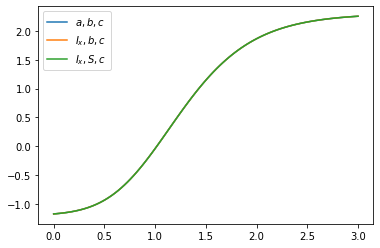

In [30]:
pyplot.plot(X, asymmetric_logistic_a_b_c(X, (L_L, L_U, a, b, c)), label='$a, b, c$')
pyplot.plot(X, asymmetric_logistic_I_x_b_c(X, (L_L, L_U, I_x, b, c)), label='$I_x, b, c$')
pyplot.plot(X, asymmetric_logistic_I_x_S_c(X, (L_L, L_U, I_x, S, c)), label='$I_x, S, c$')
pyplot.legend()
pyplot.show()

In [31]:
%timeit asymmetric_logistic_a_b_c(X, (L_L, L_U, a, b, c))

9.66 µs ± 310 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [32]:
%timeit asymmetric_logistic_I_x_b_c(X, (L_L, L_U, I_x, b, c))

10.1 µs ± 77.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
%timeit asymmetric_logistic_I_x_S_c(X, (L_L, L_U, I_x, S, c))

13.3 µs ± 92 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
